
Marcelo Goncalves
 
logistic regression project

this project is related to a marketing company (phones calls) of a Portuguese bank institution
and the goal in this project is to predict if the client will subscribe to a term deposit or not.


================================================================================================


This project will be divided in sections: 

## Where Section I : Data Loading. 

The idea is to:

    I:   Load the dataset into the notebook
    II:  Explore and make note of Attribute Information from UCI
    III: Understant the significance of the y column in the dataset and what are the value counts of the y column?
    IV:  lastly look fot the ratio of the two classes by cheking if the are they balanced or not?
===========================================================================================

## Section II : Data Cleaning

In this section the idea is to : 

     I:   Get the dtypes of all the columns of our dataset
     II:  Refering to the UCI data description , explore the data in columns and check if there are any errors
     III: Making note of the deviation in the dataset compared to the description provided by UCI
     IV:  Using Data Cleaning principles to figure out the best ways to get rid of the dirty data Part 
     V:   lastly Print the cleaned data
     
=============================================================================================

## Section III : Exploring data with Group by

In this section the idea is to create some primitive EDA

Use the groupby function on the mean of the following columns :

    I:   y
    II:  job
    III: marital
    IV:  education
==================================================================================================

## Section III : Exploratory Data Analysis
Here the main tasks are:

     I :   Create bar graphs to the frequency of purchase with respect to the job , martial etc
     II :  create stacked bars to same data columns with respect to
     III : Explore the age column using a histogram and note down your observations
     
=======================================================================================================
## Section IV : Categorical Variable Encoding
Hire the idea is to: 

    I : Create dummy variables for my categorial variables
    II: Explore the new dataset with these new dummy variables 
    
=================================================================================================
## Section V : Preliminary Training

In this step we will:

    I : Import the Logisitc Regression libraries
    II : Split the train and test dataset and train on the data
    III : Make note of the classification report and other metrics
    
===================================================================================================
## Section VI : Let's Improve the performance 

    I : Make note of the performance from the last training
    II : Try implementing SMOTE to balance the two class labels
    III : Make note of the y label data now , what are the rations now 
    
==================================================================================================
## Section VII : Re-Train!
the idea is to: 

    I : Explore what RFE means
    II : Implement the training process inside the RFE
    III : Loking the best columns that the RFE are found and  make a list of it
===================================================================================================
## Section VIII : Training time

the idea in here is

After found the best columns for this problem

    I :  train the model with the new data after the RFE
    II : Create the prediction system to get the metrics such as accuracy
    
==================================================================================
## Section IX : Additional Metrics
 
Here is the section that we will:

    I : Explore what Confusion Matrix means
    II : Create the confusion matrix for the predictions and make note of the outputs
    III : Create a classification report and make note of various outputs

In [3]:
# first of all, let me import all the pyhton libraries that i will use durint this project

In [ ]:
# install the matplotlib library

In [4]:


pip install matplotlib --force-reinstall

  Using cached matplotlib-3.3.4-cp38-cp38-win_amd64.whl (8.5 MB)
  Using cached kiwisolver-1.3.1-cp38-cp38-win_amd64.whl (51 kB)
  Using cached numpy-1.20.1-cp38-cp38-win_amd64.whl (13.7 MB)
  Using cached python_dateutil-2.8.1-py2.py3-none-any.whl (227 kB)
  Using cached Pillow-8.1.2-cp38-cp38-win_amd64.whl (2.2 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Attempting uninstall: kiwisolver
    Found existing installation: kiwisolver 1.3.1
    Uninstalling kiwisolver-1.3.1:
      Successfully uninstalled kiwisolver-1.3.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.1
    Uninstalling numpy-1.20.1:
      Successfully uninstalled numpy-1.20.1
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: python-dateutil
    F

In [5]:
conda install matplotlib

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [6]:
# now i have all my libraries, let's start by loading my data
# this project will be divived in differents steps

In [ ]:
conda install seaborn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

## Section I : Data Loading

 Part I : Load the dataset into the notebook

In [3]:
data=pd.read_csv("C:\\Users\\marce\\OneDrive\\Ambiente de Trabalho\\DataScience\\logistic_regression\\Portugal_bank\\portu_banking_final.csv")

C:\Users\marce\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999.0,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999.0,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999.0,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


 Part II : Explore and make note of Attribute Information from UCI
 
For that, I will be looking at the info function and the describe function to see information about my type of variables (info function) and some statistic information like mean, std, max...(describe function)

In [4]:
# get the information about my data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  object 
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [ ]:
# As we can see in information, we have 3 type of data, int float and categorical data. 6 data floating type, 4 int and 11 caterogical

In [5]:
# looking for all variables in my column 
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [ ]:
# we have 21 element in our column 

In [6]:
data.describe() 

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,258.285010,2.567593,963.568005,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,259.279249,2.770014,211.772296,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,4918.000000,56.000000,9999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [ ]:
#  In this describe function, we can see some statistic of my data, like mean quantils and std

In [7]:
# check the number of rows and columns in the DataFrame
data.shape

(41188, 21)

In [ ]:
# as we can see, we have 41188 row and 21 column, that describe the information about a client, like
# age, contact information,housing,.

In [9]:
 # loking form missing value in my data (data preprocessing)
missing_value=data.isnull().sum()

In [10]:
missing_value

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [4]:
# As we can see we do not have a missing value per feature 

# if I have a missing value I can visualize that by using the bellow code

data[data['poutcome'].isnull()]


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y


=============================================================

Part III : What is the significance of the y column in the dataset and what are the value counts of the y column?

In [ ]:
# y column is the column that tell us if the client subscribe a term deposit or not. We call that column : variable dependent. That column takes value 0 for not subscribe
# and 1 for subscribe a term deposit

Part IV : What is the ratio of the two classes ? Are they balanced ?

In [ ]:
# N/A

## Section II : Data Cleaning

Part I : Get the dtypes of all the columns of our dataset

In [11]:
data.dtypes

age                object
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays             float64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

Part II : Refering to the UCI data description , explore the data in your columns and check if there are any errors

In [12]:
data['y'].value_counts()
data['y'].value_counts(normalize=True)

0    0.887346
1    0.112654
Name: y, dtype: float64

In [ ]:
# as we can see, we have 36548 client who do not acept to subscribe a term deposit and 4640 who adhered to a term deposit
# we can see that, 89% of the client do not acept the term deposit and jut 11% acept it 

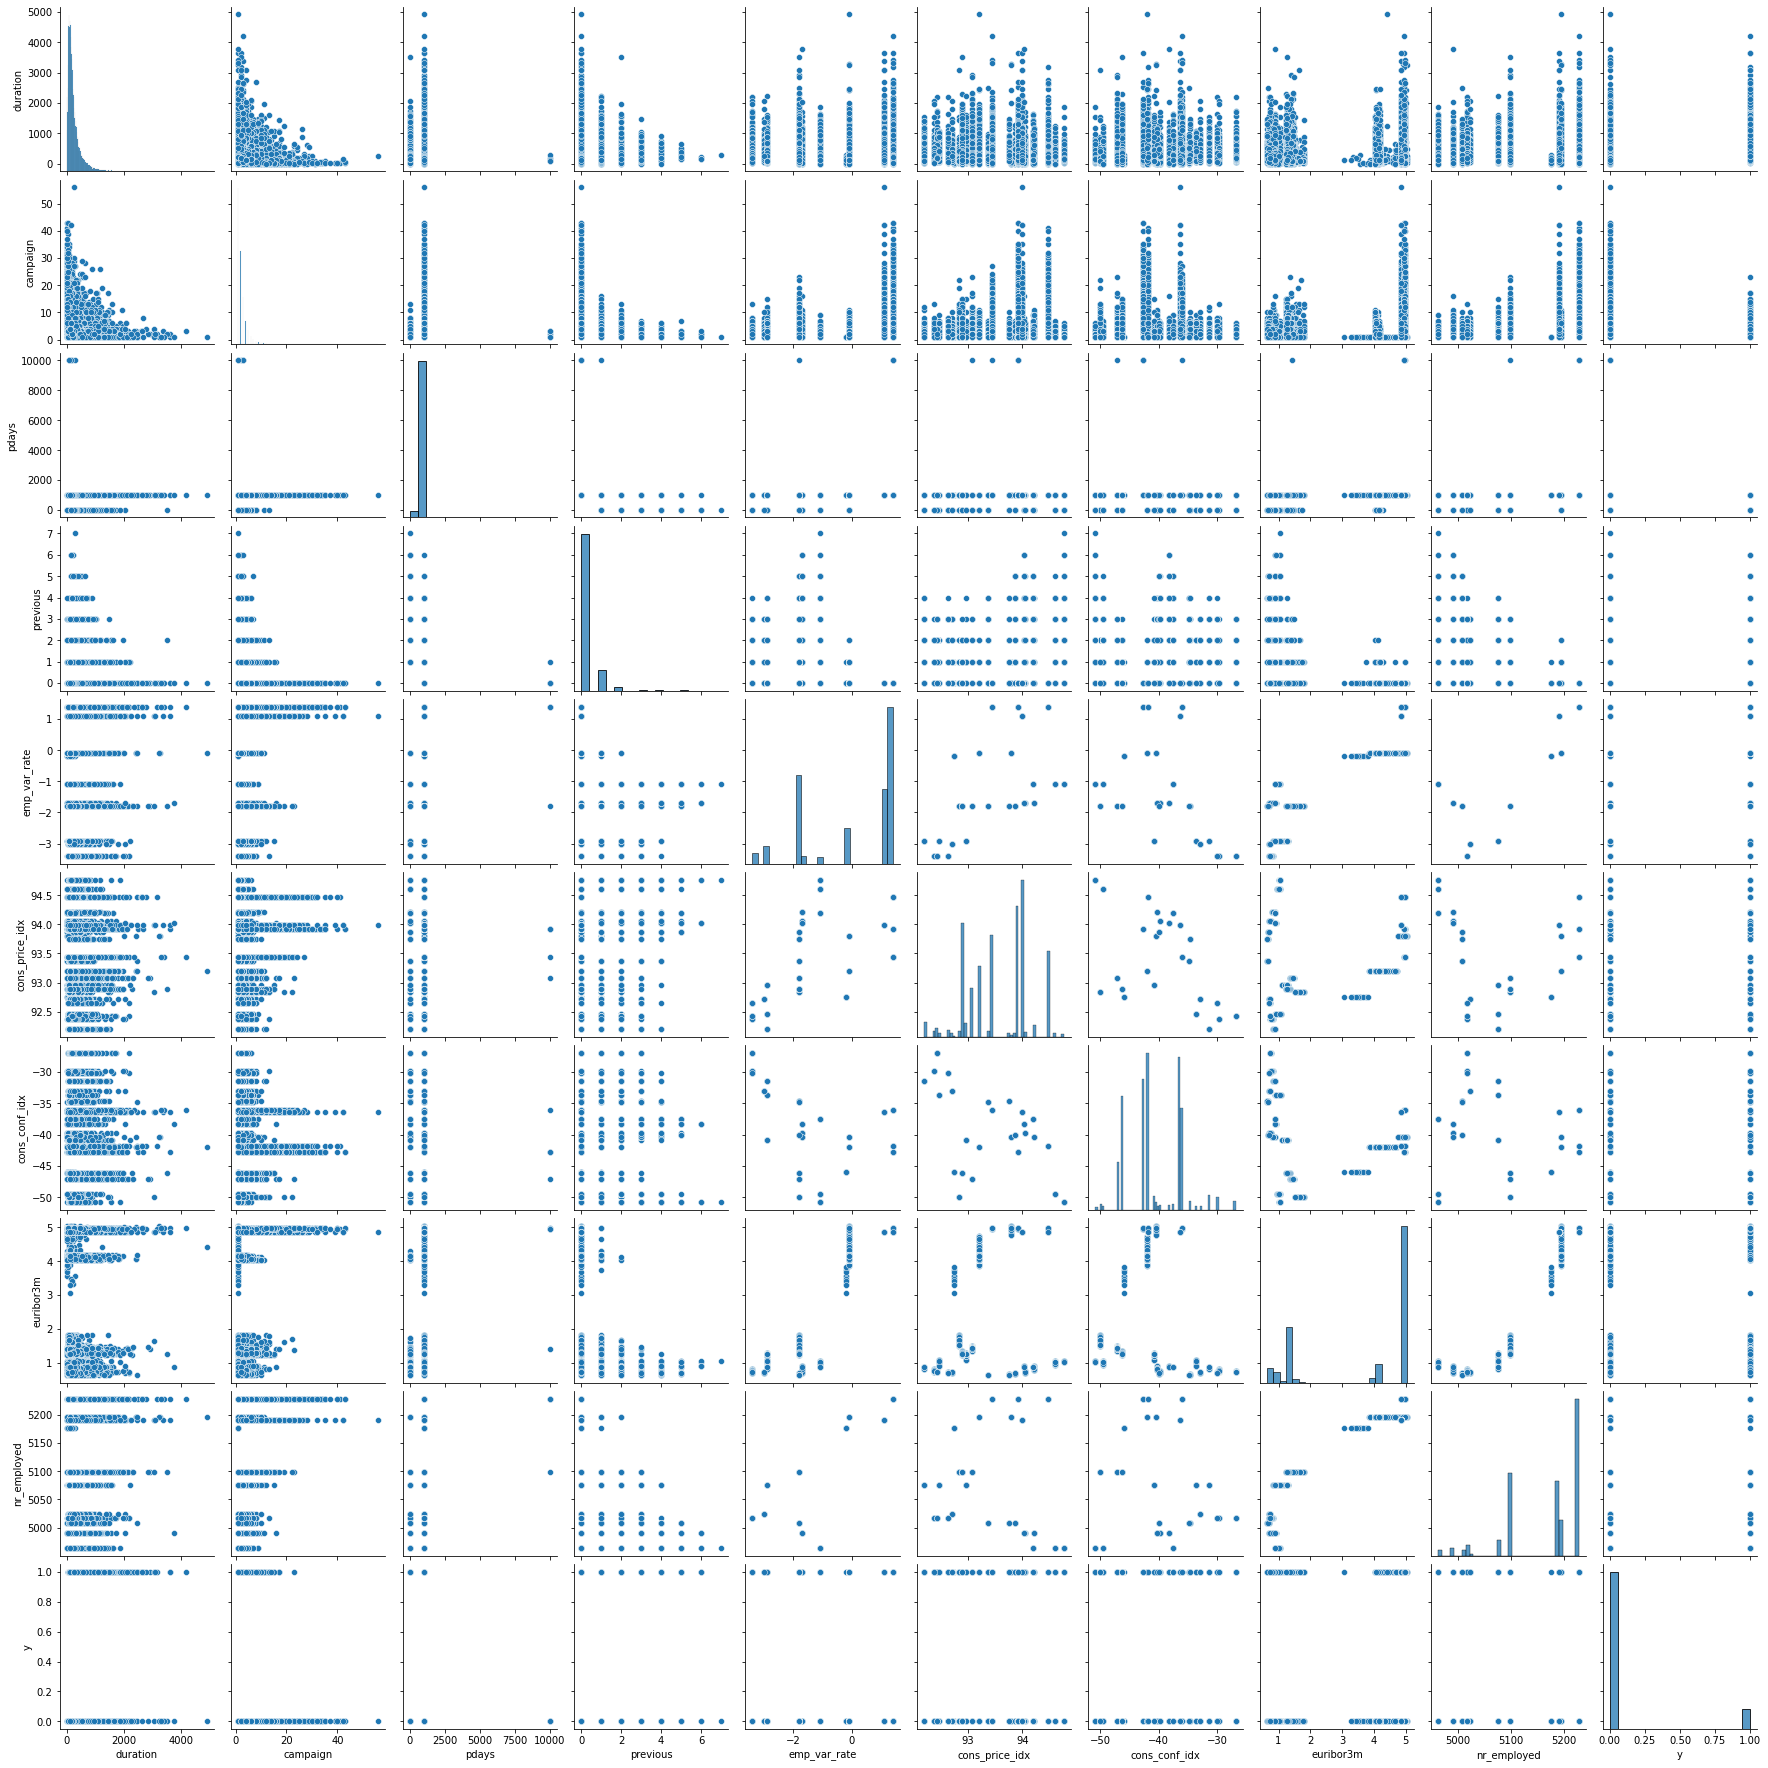

In [13]:
# see if we have outlier in the numeric variable (emp_var_rate,cons_price_idx,cons_conf_idx
# euribor3m , nr_employed ,pdays and y )
out_num=sns.pairplot(data)

In [ ]:
# if see look at the graf of numerical data, in the pdays, we can see of value around 10000, and it can be considered outler 
# I will leave like data because when I try to select value > 5000 for pdays to remove I find object value as well that 
#i can not remove


========================================================

In [14]:
data['age']

0        44
1        53
2        28
3        39
4        55
         ..
41183    59
41184    31
41185    42
41186    48
41187    25
Name: age, Length: 41188, dtype: object

In [ ]:
print(data['age'].isnull())

In [15]:
data['age']

0        44
1        53
2        28
3        39
4        55
         ..
41183    59
41184    31
41185    42
41186    48
41187    25
Name: age, Length: 41188, dtype: object

Part III : Make note of the deviation in the dataset compared to the description provided by UCI

=============================================================================

Part IV : Using Data Cleaning principles you learned from Pandas Tutorial) figure out the best ways to get rid of the dirty data Part V : Print the cleaned data

In [16]:
data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [18]:
data['job'].value_counts()

admin.           10420
blue-collar       9253
technician        6742
services          3966
management        2923
retired           1717
entrepreneur      1456
self-employed     1421
housemaid         1059
unemployed        1014
student            873
unknown            329
RETIRED              3
SERVICES             3
STUDENT              2
ADMIN.               2
MANAGEMENT           1
UNKNOWN              1
HOUSEMAID            1
BLUE-COLLAR          1
TECHNICIAN           1
Name: job, dtype: int64

In [ ]:
 # in the job we can see that, RETIRED,SERVICES,ADMIN,STUDENT,HOUSEMAID,MANAGEMENT,UNKNOWN,TECHNICIAN and BLUE-COLLAR 
# have a value very low compared to the rest. but if we see the data, we can understand that for those variable, we have the same
# but with lower case, so let's use the lambda and apply a function to work just with the lower case variable

In [20]:
data['job']=data['job'].apply(lambda x: x.lower())

In [21]:
data['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [ ]:
# let's work in our second variable marital

In [22]:
data['marital'].value_counts() 

married     24923
single      11565
divorced     4608
unknown        80
M               5
D               4
S               3
Name: marital, dtype: int64

In [23]:
# same thing, that happed with the job variable is happening with the marital variable, we have
# the same variable but, one in lower case and another in upper case with just abbreviation, M,D and S 
# so let's create a function call full_name and use the sentiment condition if, elif and else to solve this problem


In [24]:
def full_name(m_state):
    if m_state=='M':
        return 'married'
    elif m_state=='D':
        return 'divorced'
    elif m_state=='S':
        return 'single'
    else:
        return m_state
    


In [25]:
data['marital']=data['marital'].apply(full_name)

In [26]:
# let's se our marital now.
data['marital'].value_counts() 

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [27]:
# now, let's wprk in educstion variable

In [28]:
data['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6035
professional.course     5243
basic.4y                4164
basic.6y                2286
unknown                 1731
illiterate                18
basic-4y                  12
basic-9y                  10
basic-6y                   6
Name: education, dtype: int64

In [29]:
# as we can see hire. we have the same name of variable, but one with '. ' and others with '-',
# so those variable with '-' have let's value. let's use the replace function to convert thoses - into . 
# also insteat using the function to do the replaciment, i will use the lambda function

In [30]:
data['education']=data['education'].apply(lambda x: x.replace('-', '.'))

In [31]:
# let's see how education look like now 
data['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [32]:
# as we can see, now we do not have those small basic-, those value was added in the basic . for example now we can see that
# the basci.9y is 6045 and not 6035

=================================================================

In [33]:
# now let's work in the default variable

In [34]:
data['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [35]:
# default variable looks good, so I do not to have to clean or make any change in that variable 

=============================================================

In [36]:
data['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [37]:
# housing variable looks good, so I do not to have to clean or make any change in that variable 

======================================================================

In [38]:
data['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [39]:
# loan variable looks good, so I do not to have to clean or make any change in that variable 

=====================================================================================

In [40]:
data['contact'].value_counts()    

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [41]:
# contact variable looks good, so I do not to have to clean or make any change in that variable 

=====================================================================================

In [42]:
data['month'].value_counts()                

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [43]:
# month variable looks good, so I do not to have to clean or make any change in that variable 

==============================================================================

In [44]:
data['day_of_week'].value_counts()                

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [45]:
# day_of_week variable looks good, so I do not to have to clean or make any change in that variable 

## Section III : Exploring data with Group by


Use the groupby function on the mean of the following columns :

I : y

In [8]:
grouy_y=data.groupby('y') # Use the groupby function on the mean of the following columns 

In [9]:
grouy_y

In [10]:
grouy_y.mean=grouy_y.mean()

In [11]:
grouy_y.mean

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,
0,220.844807,2.633085,985.345135,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [50]:
# you can see that, the mean of age of people who do not subscribe to a term deposit are 40 years old and who subscribe to a term deposit 
# are in the age of 41. so people who have more age has more clarity in subscribing.
# for the duration of a phone call, we can say that the company took 553 minutes to convince the client to subscribe to a term deposit
# for the campaign to convince each client, the company had to call at least 2 times each for the client.
# pdays it took 792 days after the client was last contacted from a previous campaign to convince than to subscre


=====================================================================================

II : job

In [9]:
grouy_job=data.groupby('job')
grouy_job.mean=grouy_job.mean()
grouy_job.mean

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,
ADMIN.,637.000000,1.500000,999.000000,0.000000,1.100000,93.994000,-36.400000,4.858500,5191.000000,0.000000
BLUE-COLLAR,5.000000,7.000000,999.000000,1.000000,-1.800000,92.893000,-46.200000,1.281000,5099.100000,0.000000
HOUSEMAID,84.000000,1.000000,999.000000,0.000000,-0.100000,93.200000,-42.000000,4.153000,5195.800000,0.000000
MANAGEMENT,1225.000000,2.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.884000,5076.200000,0.000000
RETIRED,545.000000,1.666667,668.000000,1.000000,-1.566667,93.142667,-37.233333,1.976667,5087.866667,0.333333
SERVICES,238.333333,2.000000,999.000000,0.000000,1.200000,94.151000,-38.200000,4.892000,5203.366667,0.000000
STUDENT,638.500000,1.500000,505.500000,0.500000,-1.750000,94.045500,-40.150000,0.752500,5000.150000,1.000000
TECHNICIAN,834.000000,9.000000,999.000000,0.000000,1.100000,93.994000,-36.400000,4.855000,5191.000000,0.000000
UNKNOWN,54.000000,4.000000,999.000000,0.000000,1.100000,93.994000,-36.400000,4.864000,5191.000000,0.000000


===============================================================================

III : marital

In [10]:
grouy_marital=data.groupby('marital')
grouy_marital.mean=grouy_marital.mean()
grouy_marital.mean

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,
D,87.500000,1.250000,999.000000,0.000000,1.250000,93.974250,-37.675000,4.909750,5209.550000,0.000000
M,418.400000,2.600000,999.000000,0.200000,-0.960000,92.931400,-37.560000,2.589200,5141.540000,0.000000
S,283.333333,2.000000,999.000000,0.000000,-0.233333,93.396333,-34.733333,3.531333,5152.733333,0.000000
divorced,253.934679,2.614583,968.613498,0.168837,0.163043,93.606244,-40.709701,3.714567,5170.845074,0.103299
married,257.406332,2.572804,967.963528,0.155599,0.183854,93.597501,-40.271203,3.746064,5171.854853,0.101593
single,261.518720,2.533939,952.231474,0.211414,-0.167972,93.517331,-40.920303,3.317391,5155.199905,0.140078
unknown,312.725000,3.187500,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


IV : education

In [11]:
grouy_education=data.groupby('education')
grouy_education.mean=grouy_education.mean()
grouy_education.mean

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,
basic-4y,259.750000,4.250000,915.916667,0.250000,0.166667,93.747500,-42.225000,3.615083,5167.266667,0.083333
basic-6y,222.500000,2.500000,999.000000,0.000000,0.766667,93.784667,-39.933333,4.313333,5194.233333,0.000000
basic-9y,144.900000,1.600000,999.000000,0.200000,0.270000,93.732300,-42.120000,3.716900,5161.490000,0.000000
basic.4y,264.842459,2.595821,970.171230,0.146734,0.216066,93.658052,-40.234150,3.752162,5170.133117,0.102546
basic.6y,264.524497,2.556430,980.319335,0.129484,0.229746,93.649709,-41.131015,3.771524,5174.666842,0.082240
basic.9y,261.484673,2.533886,979.100249,0.141342,0.159056,93.623218,-41.325435,3.697932,5172.311914,0.078376
high.school,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,252.533855,2.586115,962.482548,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485


Make a note of what you learn from the outputs !



In [5]:
# we can not find correlation on categorical variable like job,marital and education 

## Section III : Exploratory Data Analysis

Part I : Create bar graphs to the frequency of purchase with respect to the job , martial etc

C:\Users\marce\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='campaign', ylabel='housing'>

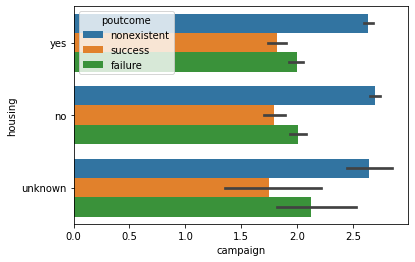

In [54]:
# regular bar plot
sns.barplot(data['campaign'], data['housing'],hue=data['poutcome'])

count    41188.000000
mean         0.112654
std          0.316173
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: y, dtype: float64


C:\Users\marce\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


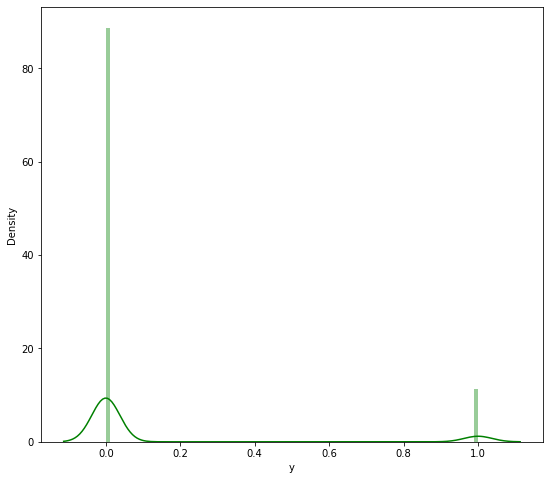

In [13]:
print(data['y'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(data['y'], color='g', bins=100, hist_kws={'alpha': 0.4});

Part II : Also create stacked bars to same data columns with respect to

C:\Users\marce\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='emp_var_rate', ylabel='cons_price_idx'>

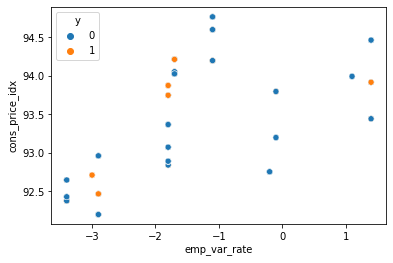

In [55]:
# regular bar plot
sns.scatterplot(data['emp_var_rate'], data['cons_price_idx'],hue=data['y'])

Part III : Explore the age column using a histogram and note down your observations

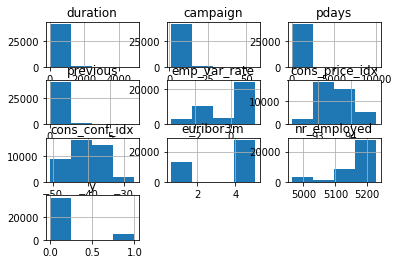

In [56]:
hist = data.hist(bins=4)

<AxesSubplot:ylabel='Frequency'>

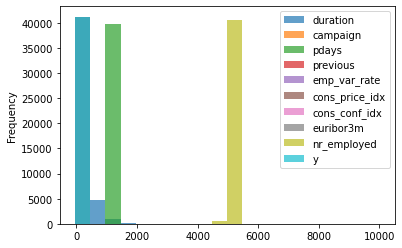

In [57]:
data.plot.hist(bins=20, alpha=0.7)

In [45]:
# print all no numerical variable
df_not_num = data.select_dtypes(include = ['O'])
print('There is {} non numerical features including:\n{}'.format(len(df_not_num.columns), df_not_num.columns.tolist()))

There is 11 non numerical features including:
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


In [46]:
data = data.corr()['y'][:] 
golden_features_list = final_data[abs(final_data) > 0.25].sort_values(ascending=False)
print("There is {} strongly correlated values with y:\n{}".format(len(golden_features_list), golden_features_list))

There is 7 strongly correlated values with y:
y                   1.000000
duration            0.405274
poutcome_success    0.316269
pdays              -0.288609
emp_var_rate       -0.298334
euribor3m          -0.307771
nr_employed        -0.354678
Name: y, dtype: float64


<ipython-input-43-44f9464776ab>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
<ipython-input-43-44f9464776ab>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
<ipython-input-43-44f9464776ab>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
<ipython-input-43-44f9464776ab>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
<ipython-input-43-44f9464776ab>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
<ipython-input-43-44f9464776ab>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_x

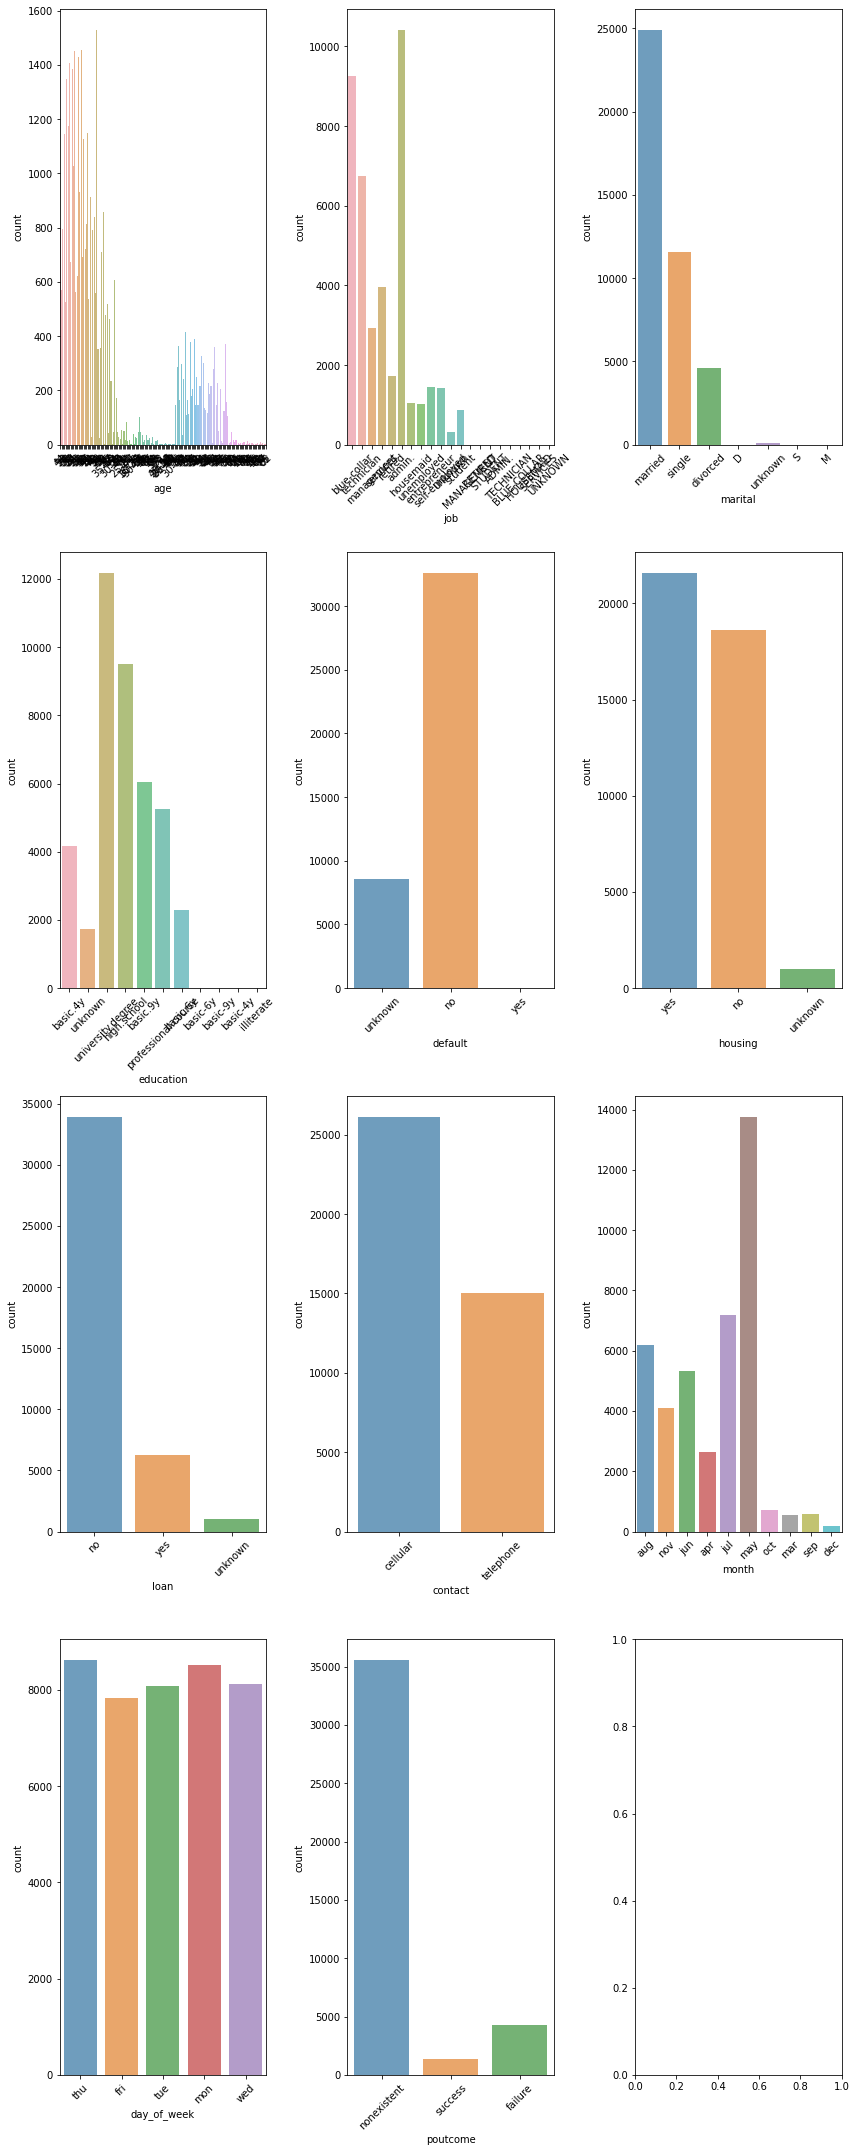

In [43]:
fig, axes = plt.subplots(round(len(df_not_num.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(df_not_num.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df_not_num.columns[i], alpha=0.7, data=df_not_num, ax=ax)

fig.tight_layout()

## Section IV : Categorical Variable Encoding


Part I : Create dummy variables for your categorial variables

In [59]:
# here the idea is to convert all object varible(categorical variable) in numeric variable, so that when we start to traing the data, everything will
# be more logival and easy

In [60]:
# so let's work with all abject variable (categorical variable). I will call my info function to see how many object variable that i have.
# as we can see above i have 11 object variable [age,job,marital,education,default,housing,loan, contact,month,day_of_week and poutcome]\
# so let's create a dummy function for each of those variable mentione above.

In [113]:
data['age'].unique() # as we can see, those value are 

array(['44', '53', '28', '39', '55', '30', '37', '36', '27', '34', '41',
       '33', '26', '52', '35', '40', '32', '49', '38', '47', '46', '29',
       '54', '42', '72', '48', '43', '56', '31', '24', '68', '59', '50',
       '45', '35-30', '25', '57', '63', '58', '60', '30-35', '64', '51',
       '23', '20', '74', '80', '61', '25-30', '62', '75', '21', '82',
       '77', '18-25', '30-32', '70', '50-55', '76', '73', '66', '22',
       '71', '19', '79', '88', '65', '67', '81', '18', '84', '69', '98',
       '85', '83', '78', '92', '45-50', '20-25', '20-40', '35-40', '86',
       '94', '17', '91', '89', '87', '95', '30-40', 56, 39, 30, 53, 37,
       22, 45, 31, 24, 50, 58, 33, 27, 28, 32, 51, 41, 49, 43, 44, 35, 29,
       26, 57, 25, 42, 48, 46, 67, 38, 34, 54, 40, 23, 47, 62, 75, 55, 36,
       52, 59, 78, 70, 60, 20, 66, 61, 21, 88, 18, 68, 71, 73, 80, 79, 63,
       76, 83, 65, 19, 86, 17, 72, 69, 81, 64, 77, 74, 85, 82],
      dtype=object)

In [16]:
age_dummies=pd.get_dummies(data['age'])

In [17]:
age_dummies # my age_dummies will be 0, for first column, 1 for second and ... 


,17,18,19,20,21,22,23,24,25,26,...,85,86,87,88,89,91,92,94,95,98
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41184,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41185,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41186,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
age_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Columns: 159 entries, 17 to 98
dtypes: uint8(159)
memory usage: 6.2 MB


In [19]:
# so now i have my age_dummies, let's add it into my data. so for that, i will create an variable called final_dummies and store
# all new variable into it.

In [22]:
final_dummies=pd.concat([data,age_dummies],axis=1) # as we can see, my age_dummies because a lit strange, but ask questions?
# now that i have my age_dummies, i am suppot to drop de age column. but for now i will leave like that until speak with my tutor

In [23]:
features=['age', 'job','marital','default','housing','loan',
                                           'contact','month','day_of_week','poutcome','education']


In [24]:
final_data=pd.get_dummies(data,columns=features)
print (data.shape)
print (final_data.shape)

(41188, 21)
(41188, 237)


In [25]:
# now let's remove the age column 
#final_dummies=final_dummies.drop('age',axis=1,inplace=True)

In [128]:
#final_dummies

========================================================================================================

In [160]:
# let do the same, for de second categorical variable that is job
#data['job'].unique()

In [130]:
# as we can see, we have 12 unique job variable. so let's use the dummy function to converte those variable into numerical 

In [131]:
#job_dummies=pd.get_dummies(data['job'])

In [132]:
#job_dummies

In [133]:
# so now i have my job_dummies, let's add it into my data. so for that, i will create an variable called final_dummies and store
# all new variable into it. 
#final_dummies=pd.concat([data,job_dummies],axis=1)

In [134]:
#final_dummies

In [135]:
#final_dummies=final_dummies.drop('job',axis=1, inplace=True)

In [136]:
#final_dummies

==========================================================================================================

In [137]:
"""marital_dummies=pd.get_dummies(data['marital'])
final_dummies=pd.concat([data,marital_dummies],axis=1)
final_dummies"""

"marital_dummies=pd.get_dummies(data['marital'])\nfinal_dummies=pd.concat([data,marital_dummies],axis=1)\nfinal_dummies"

In [161]:
#final_dummies=final_dummies.drop('marital',axis=1)
#data['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [138]:
# now let's remove the age column 
#final_dummies

===============================================================================================================

In [139]:
#education_dummies=pd.get_dummies(data['education'])
#final_dummies=pd.concat([data,education_dummies],axis=1)
#final_dummies

In [126]:
#final_dummies=final_dummies.drop('education',axis=1)

In [140]:
#final_dummies

=================================================================================================================

In [141]:
#default_dummies=pd.get_dummies(data['default'])
#final_dummies=pd.concat([data,default_dummies],axis=1)
#final_dummies

In [85]:
#final_dummies=final_dummies.drop('default',axis=1)

In [142]:
#final_dummies

==================================================================================================================

In [143]:
#housing_dummies=pd.get_dummies(data['housing'])
#final_dummies=pd.concat([data,housing_dummies],axis=1)
#final_dummies 

In [88]:
#final_dummies=final_dummies.drop('housing',axis=1)

In [144]:
#final_dummies

================================================================================================================

In [145]:
#loan_dummies=pd.get_dummies(data['loan'])
#final_dummies=pd.concat([data,loan_dummies],axis=1)
#final_dummies

In [91]:
#final_dummies=final_dummies.drop('loan',axis=1)

In [146]:
#final_dummies

===========================================================================================================

In [147]:
#contact_dummies=pd.get_dummies(data['contact'])
#final_dummies=pd.concat([data,contact_dummies],axis=1)
#final_dummies

In [94]:
#final_dummies=final_dummies.drop('contact',axis=1)

In [148]:
#final_dummies

============================================================================================

In [149]:
#month_dummies=pd.get_dummies(data['month'])
#final_dummies=pd.concat([data,month_dummies],axis=1)
#final_dummies

In [97]:
#final_dummies=final_dummies.drop('month',axis=1)

In [150]:
#final_dummies

==================================================================================

In [151]:
#day_of_week_dummies=pd.get_dummies(data['day_of_week'])
#final_dummies=pd.concat([data,day_of_week_dummies],axis=1)
#final_dummies

In [100]:
#final_dummies=final_dummies.drop('day_of_week',axis=1)

In [152]:
#final_dummies

In [153]:
#poutcome_dummies=pd.get_dummies(data['poutcome'])
#poutcome_dummies


In [103]:
#final_dummies=pd.concat([data,poutcome_dummies],axis=1)

In [104]:
#final_dummies=final_dummies.drop('poutcome',axis=1)

In [154]:
#final_dummies

In [157]:
#final_dummies = final_dummies.drop(columns=['age', 'job','marital','default','housing','loan',
                                          # 'contact','month','day_of_week','poutcome','education'],errors='ignore')
#final_dummies

====================================================================================

In [ ]:
# now i have all my dummies variable, let's drop all object variable
#final_dummies = final_dummies.drop(["age", "job","marital","education","default","housing","loan","contact"], axis=1)

part II : Explore your new dataset with these new dummy variables !

In [16]:
print (data.shape)
print (final_data.shape)

(41188, 21)
(41188, 237)


In [ ]:
# as we can see now (after get all categorical variable in dummies variable(numerical)) we have 222 column instead of 21
# that's because when we do variable.unique, we can get 4 unique value. AS an example marital have 4 uniques values
#('married', 'single', 'divorced', 'unknown') so just for marital the column increase 4 element. 

<AxesSubplot:ylabel='Frequency'>

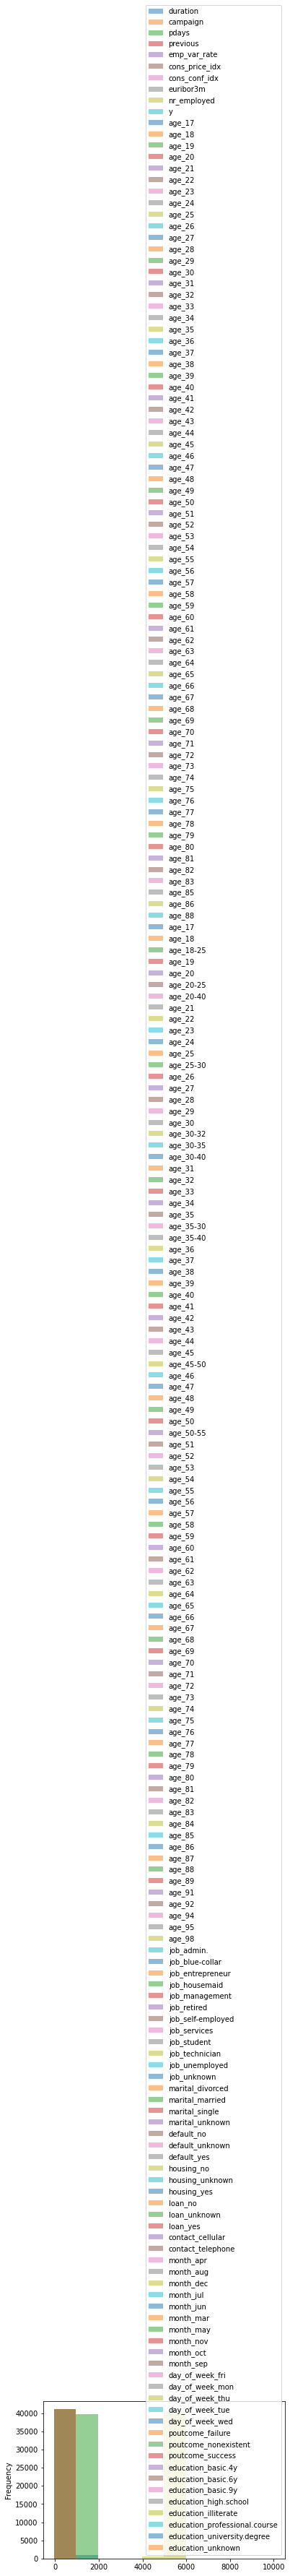

In [163]:
final_data.plot.hist(bins=10, alpha=0.5)

In [17]:
final_data.head(5)

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,...,education_basic-6y,education_basic-9y,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,210,1,999.0,0,1.4,93.444,-36.1,4.963,5228.1,0,...,0,0,1,0,0,0,0,0,0,0
1,138,1,999.0,0,-0.1,93.200,-42.0,4.021,5195.8,0,...,0,0,0,0,0,0,0,0,0,1
2,339,3,6.0,2,-1.7,94.055,-39.8,0.729,4991.6,1,...,0,0,0,0,0,0,0,0,1,0
3,185,2,999.0,0,-1.8,93.075,-47.1,1.405,5099.1,0,...,0,0,0,0,0,1,0,0,0,0
4,137,1,3.0,1,-2.9,92.201,-31.4,0.869,5076.2,1,...,0,0,1,0,0,0,0,0,0,0


In [167]:

final_data.describe()

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,...,poutcome_nonexistent,poutcome_success,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,258.285010,2.567593,963.568005,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654,...,0.863431,0.033335,0.101389,0.055647,0.146766,0.231014,0.000437,0.127294,0.295426,0.042027
std,259.279249,2.770014,211.772296,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173,...,0.343396,0.179512,0.301846,0.229242,0.353877,0.421486,0.020901,0.333306,0.456239,0.200653
min,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,4918.000000,56.000000,9999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [170]:
 #check the number of null values for each column in the dataset 
final_data.isnull().sum()

duration                         0
campaign                         0
pdays                            0
previous                         0
emp_var_rate                     0
                                ..
education_high.school            0
education_illiterate             0
education_professional.course    0
education_university.degree      0
education_unknown                0
Length: 222, dtype: int64

In [171]:
final_data.corr()

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,...,poutcome_nonexistent,poutcome_success,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
duration,1.000000,-0.071699,-0.044035,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274,...,-0.011665,0.044876,0.008476,0.005739,0.004810,0.005500,0.001491,-0.008472,-0.012641,0.003317
campaign,-0.071699,1.000000,0.045353,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357,...,0.087645,-0.050893,0.004000,-0.000991,-0.005278,0.000195,-0.002188,0.002554,-0.000950,0.002162
pdays,-0.044035,0.045353,1.000000,-0.518260,0.241416,0.070331,-0.082578,0.263918,0.331380,-0.288609,...,0.432717,-0.840049,0.010226,0.019258,0.030484,0.002046,-0.001949,-0.001958,-0.031436,-0.020510
previous,0.020640,-0.079141,-0.518260,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181,...,-0.878776,0.524045,-0.017601,-0.021493,-0.026418,0.014347,-0.002613,-0.007631,0.025419,0.022641
emp_var_rate,-0.027968,0.150754,0.241416,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334,...,0.472501,-0.256886,0.028660,0.023065,0.020422,-0.017078,-0.002865,0.022154,-0.045331,-0.003038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
education_high.school,0.005500,0.000195,0.002046,0.014347,-0.017078,0.008704,-0.051876,-0.020583,-0.015485,-0.007452,...,-0.019047,-0.007439,-0.184106,-0.133050,-0.227320,1.000000,-0.011461,-0.209330,-0.354912,-0.114801
education_illiterate,0.001491,-0.002188,-0.001949,-0.002613,-0.002865,-0.009332,0.002497,-0.001263,0.001372,0.007246,...,0.001550,0.002588,-0.007024,-0.005076,-0.008672,-0.011461,1.000000,-0.007986,-0.013540,-0.004380
education_professional.course,-0.008472,0.002554,-0.001958,-0.007631,0.022154,-0.003827,0.031234,0.019634,0.016493,0.001003,...,0.006370,0.003338,-0.128286,-0.092710,-0.158398,-0.209330,-0.007986,1.000000,-0.247304,-0.079994
education_university.degree,-0.012641,-0.000950,-0.031436,0.025419,-0.045331,-0.091954,0.073705,-0.034208,-0.034143,0.050364,...,-0.017547,0.037762,-0.217505,-0.157187,-0.268559,-0.354912,-0.013540,-0.247304,1.000000,-0.135627


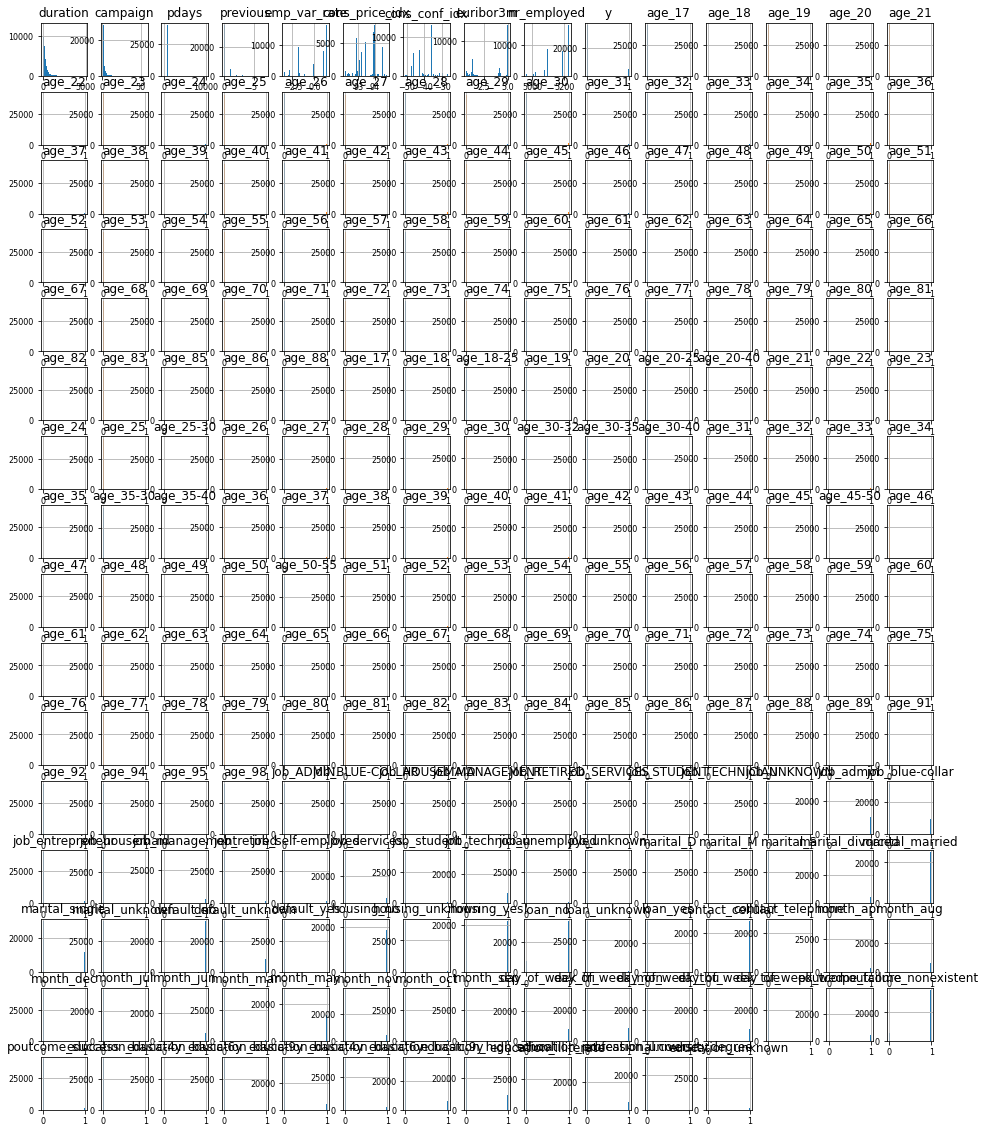

In [26]:
final_data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [41]:
# looking for missing value in my final_data
final_data.isnull().sum()

0

## Section V : Preliminary Training


Part I : Import your Logisitc Regression libraries

In [18]:
from sklearn.linear_model import LogisticRegression

Part II : Split your train and test dataset and train on the data


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
# define my variable dependent and independent 

In [38]:
# determine my x and y variable

In [39]:
y=final_data['y'].values

In [40]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [41]:
# define my x variable

In [42]:
x=final_data.drop('y',axis=1).values

In [43]:
x

array([[210.,   1., 999., ...,   0.,   0.,   0.],
       [138.,   1., 999., ...,   0.,   0.,   1.],
       [339.,   3.,   6., ...,   0.,   1.,   0.],
       ...,
       [ 62.,   3., 999., ...,   0.,   1.,   0.],
       [200.,   2., 999., ...,   1.,   0.,   0.],
       [112.,   4., 999., ...,   0.,   0.,   0.]])

In [44]:
# print the x and y shape to see if my data is corect

In [45]:
print (y.shape)
print(x.shape)

(41188,)
(41188, 236)


In [46]:
# split my data
# usinf function train_test_function

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x, y,train_size=0.8,test_size=0.2, random_state=0)
# i will use 80% to train my data and % 20 to test it

In [48]:
print ("X_train: ", x_train)
print ("y_train: ", y_train)
print("X_test: ", x_test)
print ("y_test: ", y_test)

X_train:  [[ 42.   7. 999. ...   1.   0.   0.]
 [514.   7. 999. ...   0.   1.   0.]
 [319.   2. 999. ...   0.   0.   0.]
 ...
 [371.   2. 999. ...   1.   0.   0.]
 [202.   2. 999. ...   0.   0.   0.]
 [128.   1. 999. ...   1.   0.   0.]]
y_train:  [0 0 0 ... 1 0 0]
X_test:  [[104.   4. 999. ...   0.   0.   0.]
 [551.   3. 999. ...   1.   0.   0.]
 [116.   2. 999. ...   0.   0.   0.]
 ...
 [  5.   1. 999. ...   0.   1.   0.]
 [374.   1. 999. ...   0.   0.   0.]
 [ 21.  35. 999. ...   0.   0.   0.]]
y_test:  [0 0 0 ... 0 0 0]


In [49]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(32950, 236)
(32950,)
(8238, 236)
(8238,)


In [50]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

Part III : Make note of the classification report and other metrics



In [51]:
model = LogisticRegression(verbose=1)
model.fit(x_train, y_train) #Training the model by fiting my data

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\marce\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished


LogisticRegression(verbose=1)

In [64]:
#Test my model using prediction
y_pred_model  = model .predict(x_test) #Making predictions to test the model on test data
print('Logistic Regress Train accuracy is %s' % model .score(x_train, y_train)) #Train accuracy

print('Logistic Regression Test accuracy is %s' % accuracy_score(y_pred_model , y_test)) #Test accuracy





Logistic Regress Train accuracy is 0.9128072837632777
Logistic Regression Test accuracy is 0.9127215343529983


In [53]:
# the accuracy of my test data is 0.91%, however, my model know this data and he knows this data
 
print ("the train accuracy is ",model.score(x_train,y_train))

#==============
# so now, let's use the data that we did not use to train the model
print ("the test accuracy is ",model.score(x_test,y_test))
# the test accuracy is 0.9127. this is not really good because we shuld to expect lower % in the model that our model did not know the data

the train accuracy is  0.9128072837632777
the test accuracy is  0.9127215343529983


In [54]:
model.predict_proba( x_train) #probability accuracy


array([[0.99135557, 0.00864443],
       [0.9109815 , 0.0890185 ],
       [0.97133933, 0.02866067],
       ...,
       [0.92909076, 0.07090924],
       [0.95984164, 0.04015836],
       [0.97236035, 0.02763965]])

In [55]:
# that's mean for the first column in my vector, the probability of subscrebe a term deposit is almost zero (0.00902042)
# and the probability of not subscrebe is very high .99097958

In [66]:
# coeficient of my feature


In [67]:
# print classification report
print(classification_report(y_test, y_pred_model))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7325
           1       0.66      0.43      0.52       913

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238



## Section VI : Let's Improve the performance

Part 0 : What was your answer to Section - Part IV? Do you think class imbalance affects the model performance? Explore SMOTE implementation

In [57]:
# another way to evaluente my model is create a confusion matrix function 
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix



In [58]:
def plot_conf_matrix(cm,classes=None,title='Confusion matrix'):
    if classes is not None:
        sns.heatmap(cm,xticklabels=classes,yticklabels=classes,vmin=0.,vmax=1.,annot=True,annot_kws={'size':50})
    else:
        sns.heatmap(cm,vmin=0., vmax=1.)
        plt.title(title)
        plt.xlabel('True label')
        plt.ylabel('Predicted label')
        

In [59]:
# vizualize my CM
cm=confusion_matrix(y_test,y_pred_model)
cm

array([[7127,  198],
       [ 521,  392]], dtype=int64)

In [60]:
#  I preditc 7128 corect to not be subscrebe a term deposit and at the same level a predict 197 wrong Those number is supost to be subscrebe 


In [61]:
# normalize the confusion matrix
cm_norm=cm/cm.sum(axis=1).reshape(-1,1)
cm_norm

array([[0.97296928, 0.02703072],
       [0.57064622, 0.42935378]])

Part I : Make note of the performance from the last training

As we can see in the report, we have 0.93% of client who will not subscrebe a term deposit and 0.66 % of client who will subscrebe
For the f1-score we have 91% of  accurancy 

Part II : Try implementing SMOTE to balance the two class labels

In [62]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

###===========================================================

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel())



##======================================

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 3727
Before OverSampling, counts of label '0': 29223 

After OverSampling, the shape of train_X: (58446, 236)
After OverSampling, the shape of train_y: (58446,) 

After OverSampling, counts of label '1': 29223
After OverSampling, counts of label '0': 29223


In [65]:
model1 = LogisticRegression(verbose=1)
model1.fit(X_train_res, y_train_res) #Training the model by fiting my data

pred1 = model1.predict(x_test)

#======================================================================
# print classification report
print(classification_report(y_test, pred1))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


              precision    recall  f1-score   support

           0       0.98      0.86      0.92      7325
           1       0.44      0.85      0.58       913

    accuracy                           0.86      8238
   macro avg       0.71      0.86      0.75      8238
weighted avg       0.92      0.86      0.88      8238



C:\Users\marce\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s finished


Part III : Make note of the y label data now , what are the rations now ?

After apply the SMOTE, as we can see in the result the precision for not subscrebe a term deposit increase in 5% 
and the precision for subscrebe a term deposit decrease in 22%. 
As we can see the SMOTE application help us to improve the perfomace of the result. 

## Section VII : Let us Re-Train!

Part I : Explore what RFE means

The Recursive Feature Elimination (RFE) method is a feature selection approach. It works by recursively removing attributes and building a model on those attributes that remain. It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

-------------------------------------------------------------------

https://machinelearningmastery.com/feature-selection-in-python-with-scikit-learn/

Part II : Implement your training process inside the RFE

In [70]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [74]:
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

ValueError: Unknown label type: 'continuous'

Part III : What are the best columns that your RFE found? Please make a list of it

## Section VIII : Training time !


Now that you have found the best columns for this problem



Part I : Now train the model with the new data you have created after the RFE


Part II : Create the prediction system to get the metrics such as accuracy

## Section IX : Additional Metrics


Accuracy is not always the best metric

Part I : Explore what Confusion Matrix means


Confusion Matrix is a performance measurement for machine learning classification problem where output can be two or more classes
in the CM we have 4 differente combination of predited value. True Positive(when you predict positive and it is positive),
True negative (you predict negative and is negative ), False positive(you predict positive and it is not positive)
and False negative (you predict negative and it's poisitve )
Confusion Matrix is useful for measuring Recall, Precision, Specificity, Accuracy and most importantly AUC-ROC Curve

===========================================================================================
https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

Part II : Create the confusion matrix for the predictions and make note of the outputs


In [210]:
# Importing the dependancies
from sklearn import metrics
# Printing the confusion matrix
# The columns will show the instances predicted for each label,
# and the rows will show the actual number of instances for each label.
print(metrics.confusion_matrix(y_test, predictions, labels=[0, 1]))
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_test, predictions, labels=[0, 1]))

[[8904  252]
 [ 655  486]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      9156
           1       0.66      0.43      0.52      1141

    accuracy                           0.91     10297
   macro avg       0.80      0.70      0.73     10297
weighted avg       0.90      0.91      0.90     10297



Part III : Create a classification report and make note of various outputs



In [211]:

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train#just assign the variable soo that we dont need to change it every time
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))#here we set the limit 
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),#real magic starts here
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

ValueError: X has 2 features per sample; expecting 221

## Section X : What's next?


Part I : Make a note of difference in performance?


Part II : Can you recommend more improvements that could give much better results in all metrics?